In [7]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.providers.aer import AerSimulator
from math import pow

In [8]:
'''
This is a quantum circuit with N qubits. A qubit can be in superposition of 2 states, 
not more.
'''
num_qbits = 16
qc = QuantumCircuit(num_qbits)

In [9]:
'''
This applies a hadamard gate to actually put the qubits into superposition 
of two states. 
'''
for qubit in range(num_qbits):
    qc.h(qubit)

In [10]:
'''
measuring collapses the wave function and forces the qubits to choose a value. 
Qubits can only have a superposition of 2 states, so the probabilities collapse
in this case to either 1 or 0. 
'''
qc.measure_all()

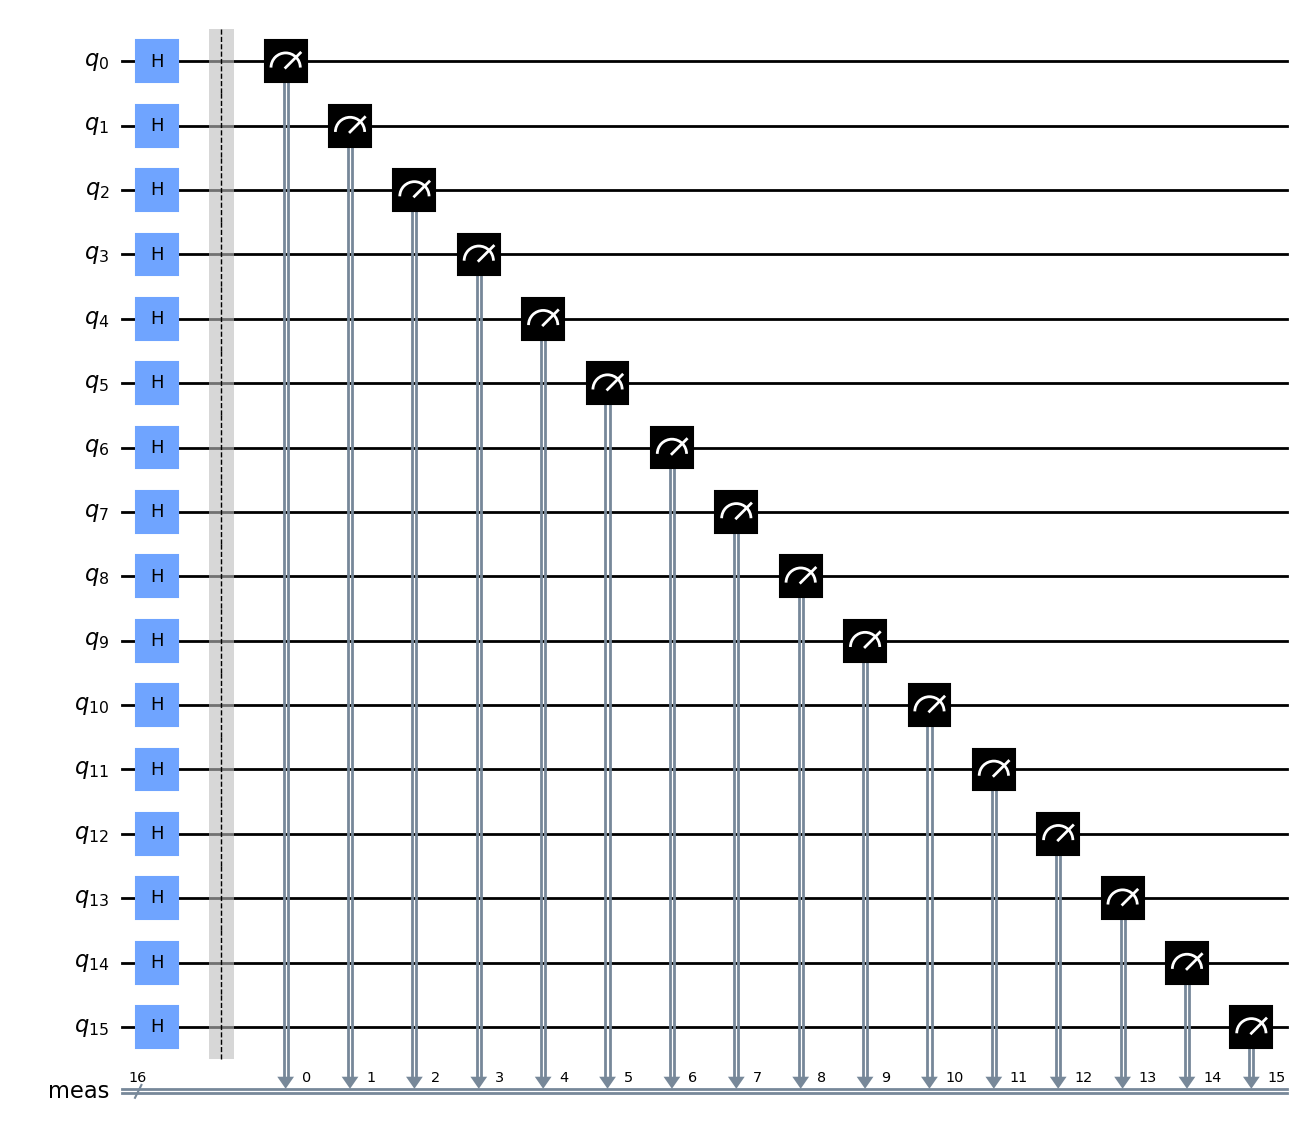

In [11]:
# Visualize the circuit
qc.draw('mpl')

In [12]:

def bin_to_dec(bin) -> int: 
    output = 0
    for i in range(len(bin)): 
        if (bin[len(bin)-i-1] == '1'): 
            output += pow(2, i)
    return output

In [14]:
#simulate the quantum operations and measurement
simulator = AerSimulator()
transpiled_circuit = transpile(qc, simulator)
result = simulator.run(transpiled_circuit, shots=1).result()


In [15]:
# Get and display the measurement results
counts = result.get_counts()
r = (list(counts.keys())[0]) 
print(r)

1111010111100100


In [16]:
print(bin_to_dec(r)) 

62948.0
